# Experiment 003: *Short facts*

In [1]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from matplotlib import pyplot as plt     # plotting methods within notebook
from scipy import stats                  # lots of statistical methods
import pandas as pd
from tueplots import bundles
import json
from collections import Counter
from tabulate import tabulate
#%matplobtlib inline

In [2]:
import os
os.chdir('../')


from src.get_data import get_data
from src.get_data_tracks import get_data_tracks
from src.save_data import save_data
from src.convert_ms import convert_ms

plt.rcParams.update(bundles.neurips2021(usetex=False))

## Hypothesis:

We want to get some short facts about the playlists, like for example:
- What is the average playlist length (tracks and duration)
- What is the number of unique tracks?
- What is the number of unique albums?
- What is the number of unique artists?
- What is the most common playlist name?

#### 1. get data + number of playlist

In [3]:
dataset = get_data(pre=True)
print(f'The computed dataset has {dataset.shape[0]:,} playlist.')
save_data('SizeDataset', f'{dataset.shape[0]:,}')

The computed dataset has 100,000 playlist.


#### 2. get data (tracks) + number of tracks

In [4]:
dataset_tracks = get_data_tracks(pre=True)
total_tracks = dataset_tracks.shape[0]
unique_tracks = len(dataset_tracks["track_uri"].unique())
ratio = total_tracks / unique_tracks
print(f'The computed dataset has {total_tracks:,} tracks (total)')
print(f'The computed dataset has {unique_tracks:,} tracks (unique)')
print(f'The ration between total and unique is {ratio}')
save_data('total_tracks', f'{total_tracks:,}')
save_data('unique_tracks', f'{unique_tracks:,}')
save_data('ratio', f'{ratio:.3f}')

The computed dataset has 6,677,800 tracks (total)
The computed dataset has 681,805 tracks (unique)
The ration between total and unique is 9.794296023056447


#### 3. number of artists

In [5]:
print(f'The computed dataset has {len(dataset_tracks["artist_uri"].unique()):,} artists (unique)')
save_data('artists_unique', f'{len(dataset_tracks["artist_uri"].unique()):,}')

The computed dataset has 110,063 artists (unique)


#### 4. number of albums

In [6]:
print(f'The computed dataset has {len(dataset_tracks["album_uri"].unique()):,} albums (unique)')
save_data('albums_unique', f'{len(dataset_tracks["album_uri"].unique()):,}')

The computed dataset has 271,413 albums (unique)


#### 5. duration

In [7]:
total_duration = dataset['duration_ms'].sum()
average_duration = total_duration/len(dataset)
print(f'The computed dataset has a total duration of {total_duration:,} ms')
print(f'The computed dataset has a average duration of {average_duration:,.3f} ms')
save_data('total_duration', f'{total_duration:,}')
save_data('average_duration', f'{average_duration:,.3f}')

The computed dataset has a total duration of 1,565,935,156,055 ms
The computed dataset has a average duration of 15,659,351.561 ms


In [8]:
converted_total_duration = convert_ms(float(total_duration))
converted_average_duration = convert_ms(float(average_duration))
print(f'The computed dataset has a total duration of {converted_total_duration} ms')
print(f'The computed dataset has a average duration of {converted_average_duration} ms')
save_data('converted_total_duration', converted_total_duration)
save_data('converted_average_duration', converted_average_duration)

The computed dataset has a total duration of 18124 days 5:59:16 ms
The computed dataset has a average duration of 4:20:59 ms


#### 6. track duration

In [9]:
average_track_duration = dataset_tracks['duration_ms'].mean()
print(f'In the computed dataset is the average duration of a track {average_track_duration:,.3f} ms')
save_data('average_track_duration', f'{average_track_duration:,.3f}')

In the computed dataset is the average duration of a track 234,498.661 ms


In [10]:
converted_average_track_duration = convert_ms(average_track_duration)
print(f'In the computed dataset is the average duration of a track {converted_average_track_duration}')
save_data('converted_average_track_duration', converted_average_track_duration)

In the computed dataset is the average duration of a track 0: 3:54


#### 7. figure: average track duration + average number of tracks

In [11]:
average_numtracks_timeline = []
total_tracks = 0
sem_timeline_track = []
data_rows_track = []
for i, num_tracks in enumerate(dataset['num_tracks']):
    data_rows_track.append(num_tracks)
    total_tracks += num_tracks
    average_numtracks_timeline.append(total_tracks / (i+1))
    if i > 1:
        sem_timeline_track.append(stats.sem(data_rows_track))
    else:
        sem_timeline_track.append(0)
    
average_numtracks = dataset['num_tracks'].mean()
save_data('average_numtracks', f'{average_numtracks:.3f}')
save_data('approx_average_numtracks', f'{average_numtracks:.0f}')

In [12]:
cal_average_playlist_duration = average_track_duration * average_numtracks
save_data('cal_average_playlist_duration', f'{cal_average_playlist_duration:,.3f}')
save_data('converted_cal_average_playlist_duration', convert_ms(cal_average_playlist_duration))

In [13]:
total_dur = 0
average_duration_timeline = []
sem_timeline_dur = []
data_rows_dur = []
for i, duration_ms in enumerate(dataset['duration_ms']):
    data_rows_dur.append(duration_ms)
    total_dur += duration_ms
    average_duration_timeline.append(total_dur / (i+1))
    if i > 1:
        sem_timeline_dur.append(stats.sem(data_rows_dur))
    else:
        sem_timeline_dur.append(0)
    
average_duration = dataset['duration_ms'].mean()

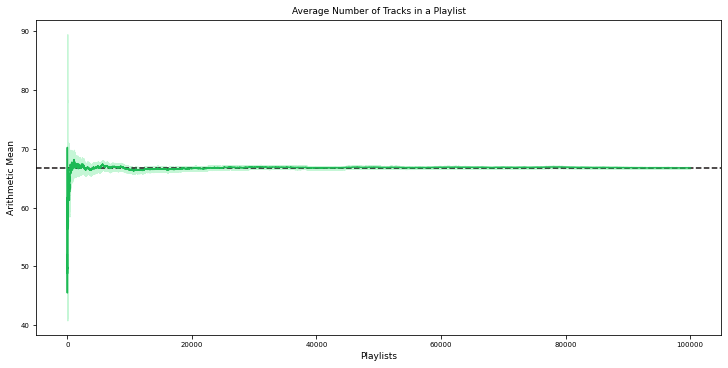

In [14]:
#fig, axs = plt.subplots(1, 2, figsize=(10, 3))
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

#axs[0].axhline(y=average_numtracks, color='#191414', linestyle='--')
#axs[0].fill_between(range(len(sem_timeline_track)), [average_numtracks_timeline[i] + sem_timeline_track[i] for i in range(len(sem_timeline_track))], [average_numtracks_timeline[i] - sem_timeline_track[i]  for i in range(len(sem_timeline_track))], color='#C5F6D6')
#axs[0].plot(average_numtracks_timeline, color='#1DB954')
#axs[0].set_title('Average Number of Tracks in a Playlist')
#axs[0].set_xlabel('Playlists')
#axs[0].set_ylabel('Arithmetic Mean')
axs.axhline(y=average_numtracks, color='#191414', linestyle='--')
axs.fill_between(range(len(sem_timeline_track)), [average_numtracks_timeline[i] + sem_timeline_track[i] for i in range(len(sem_timeline_track))], [average_numtracks_timeline[i] - sem_timeline_track[i]  for i in range(len(sem_timeline_track))], color='#C5F6D6')
axs.plot(average_numtracks_timeline, color='#1DB954')
axs.set_title('Average Number of Tracks in a Playlist')
axs.set_xlabel('Playlists')
axs.set_ylabel('Arithmetic Mean')

#axs[1].axhline(y=average_duration, color='#191414', linestyle='--')
#axs[1].fill_between(range(len(sem_timeline_dur)), [average_duration_timeline[i] + sem_timeline_dur[i] for i in range(len(sem_timeline_dur))], [average_duration_timeline[i] - sem_timeline_dur[i]  for i in range(len(sem_timeline_dur))], color='#C5F6D6')
#axs[1].plot(average_duration_timeline, color='#1DB954')
#axs[1].set_title('Average Duration of a Playlist')
#axs[1].set_xlabel('Playlists')
#axs[1].set_ylabel('Arithmetic Mean [ms]')

plt.savefig('doc/fig/averageTrack.pdf', bbox_inches='tight')
plt.show()

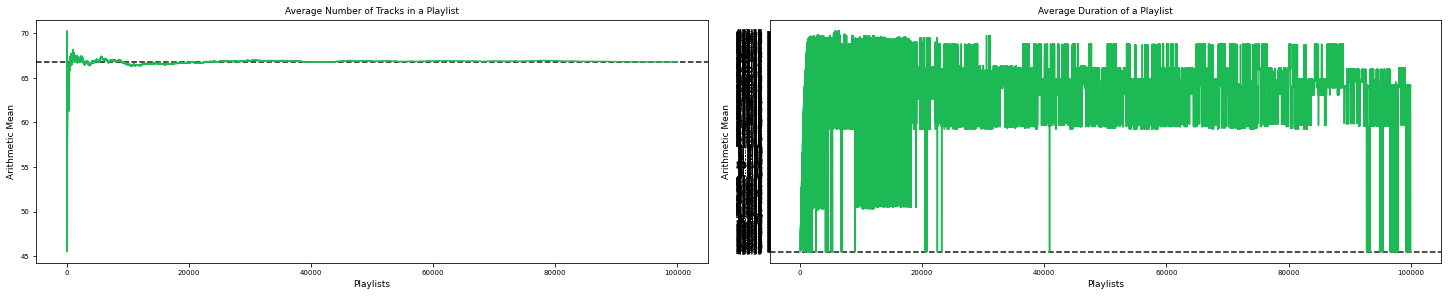

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 4))

axs[0].axhline(y=average_numtracks, color='#191414', linestyle='--')
axs[0].plot(average_numtracks_timeline, color='#1DB954')
axs[0].set_title('Average Number of Tracks in a Playlist')
axs[0].set_xlabel('Playlists')
axs[0].set_ylabel('Arithmetic Mean')

axs[1].axhline(y=convert_ms(average_duration), color='#191414', linestyle='--')
converted = []
for entry in average_duration_timeline:
    converted.append(convert_ms(entry))
axs[1].plot(converted, color='#1DB954')
axs[1].set_title('Average Duration of a Playlist')
axs[1].set_xlabel('Playlists')
axs[1].set_ylabel('Arithmetic Mean')

plt.show()

#### 8. top ten tracks, album, artists

In [16]:
top_15_tracks = []

col_track_uris = Counter(dataset_tracks['track_uri'])
for i, uri in enumerate(col_track_uris.most_common(15)):
    tmp = dataset_tracks.loc[dataset_tracks['track_uri'] == uri[0]]
    #['Pos', 'Playlists', 'Track', 'Album', 'Artist']
    top_15_tracks.append([i+1, uri[1], tmp['track_name'].values[0], tmp['album_name'].values[0], tmp['artist_name'].values[0]])

In [17]:
top_15_album = []

col_album_uris = Counter(dataset_tracks['album_uri'])
for i, uri in enumerate(col_album_uris.most_common(15)):
    tmp = dataset_tracks.loc[dataset_tracks['album_uri'] == uri[0]]
    #['Pos', 'Playlists', 'Album', 'Artist']
    top_15_album.append([i+1, uri[1], tmp['album_name'].values[0], tmp['artist_name'].values[0]])

In [18]:
top_15_artists = []

col_artists_uris = Counter(dataset_tracks['artist_uri'])
for i, uri in enumerate(col_artists_uris.most_common(15)):
    tmp = dataset_tracks.loc[dataset_tracks['artist_uri'] == uri[0]]
    #['Pos', 'Playlists', 'Artist']
    top_15_artists.append([i+1, uri[1], tmp['artist_name'].values[0]])

In [19]:
# print

print("Popular Tracks:")
print(tabulate(top_15_tracks, headers=['Pos', 'Playlists', 'Track', 'Album', 'Artist']))
print(" \nPopular Albums:")
print(tabulate(top_15_album, headers=['Pos', 'Playlists', 'Album', 'Artist']))
print("\nPopular Artists:")
print(tabulate(top_15_artists, headers=['Pos', 'Playlists', 'Artist']))

Popular Tracks:
  Pos    Playlists  Track                                    Album                    Artist
-----  -----------  ---------------------------------------  -----------------------  -----------------
    1         4441  HUMBLE.                                  DAMN.                    Kendrick Lamar
    2         4240  One Dance                                Views                    Drake
    3         4145  Closer                                   Closer                   The Chainsmokers
    4         4073  Broccoli (feat. Lil Yachty)              Big Baby DRAM            DRAM
    5         3936  Congratulations                          Stoney                   Post Malone
    6         3523  Caroline                                 Good For You             Aminé
    7         3476  iSpy (feat. Lil Yachty)                  iSpy (feat. Lil Yachty)  KYLE
    8         3456  XO TOUR Llif3                            Luv Is Rage 2            Lil Uzi Vert
    9         3439  

In [20]:
for i in range(len(top_15_tracks)):
    save_data(f'top{i+1}track_occ', top_15_tracks[i][1])
    save_data(f'top{i+1}track_name', top_15_tracks[i][2])
    save_data(f'top{i+1}album_occ', top_15_album[i][1])
    save_data(f'top{i+1}album_name', top_15_album[i][2])
    save_data(f'top{i+1}artist_occ', top_15_artists[i][1])
    save_data(f'top{i+1}artist_name', top_15_artists[i][2])